# Average of MNIST data

1. The first series of plot are averages of images with same label.

2. The second set of plot: binarization
After normalization to 1, do the following:
pixel val > 0.5 ==> pixel =1
pixel value < 0.5 ==> pixel = 0

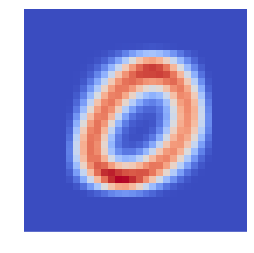

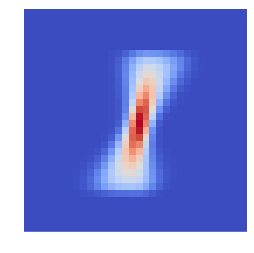

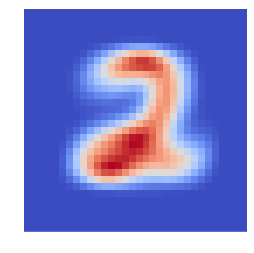

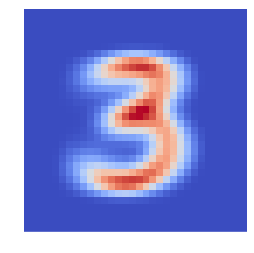

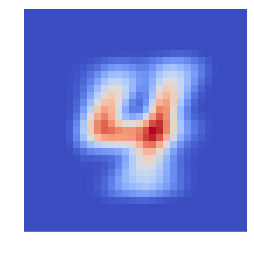

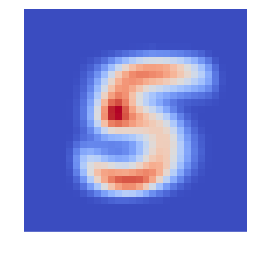

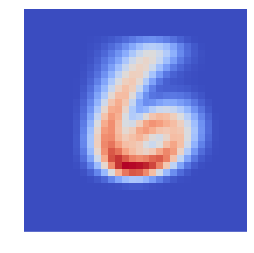

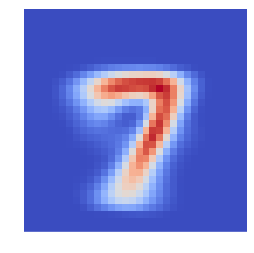

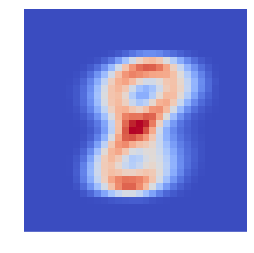

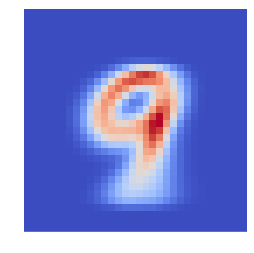

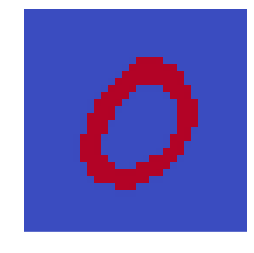

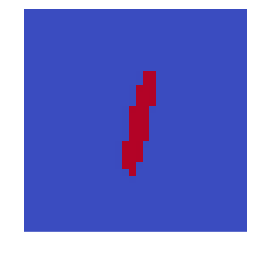

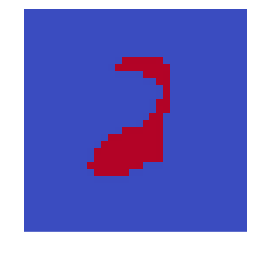

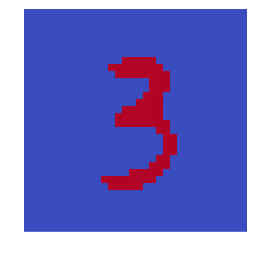

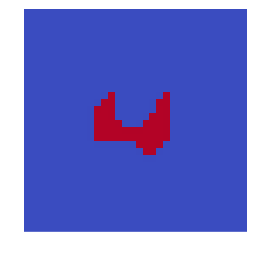

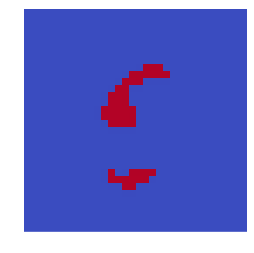

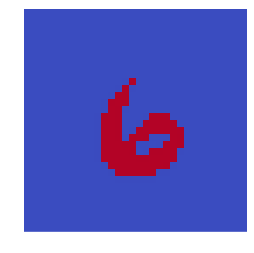

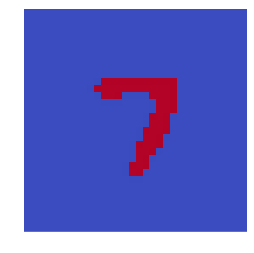

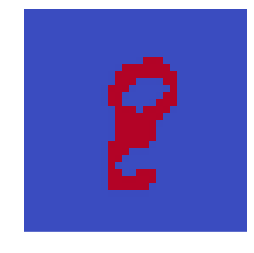

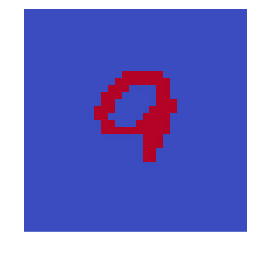

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 23 2016
@author: jmlbeaujour@gmail.com
"""
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math as math


"""
List of Parameters
"""
#mnist data (csv) file location
#csv file contains a set of imgs where each image is 28*28px i.e (18,28) matrix
# flattens into a row vector of size (1,28*28). Each px has a value between 0 and 255
#Each row is an image


def display(data, fig_nbr, do_img_scale=True):
    #imgVal True: px of images are already in range 0-255
    num_of_imgs = np.shape(data)[0]
    if do_img_scale == True:
        data = (data * 255).astype(np.uint8)
    
    #create matrix==> board
    num_imgs_row = math.ceil( math.sqrt(num_of_imgs) ) #max Nbr of image in a row     
    num_imgs_col = math.ceil( 1.0 * num_of_imgs / num_imgs_row ) #max Nbr of image in a col
    board_height = num_imgs_col * img_width + 4 + (num_imgs_col - 1 ) * 2
    board_width = num_imgs_row * img_height + 4 + (num_imgs_row - 1 ) * 2 
    display_board = np.zeros((board_height, board_width))
    active_row_col = np.array([0, 0])
    
    for i in range(num_of_imgs):
        one_image = data[i,:].reshape((img_height, img_width))
        display_board[active_row_col[0] * (28 + 2) + 2 : active_row_col[0] * (28 + 2) + img_height + 2 , active_row_col[1] * (28 + 2) + 2 : active_row_col[1] * (28 + 2) + img_width + 2] = one_image
        if ((i + 1) % num_imgs_row) == 0: #
            active_row_col[0] += 1
            active_row_col[1] = 0 
        else:
            active_row_col[1] += 1
    
    plt.figure(fig_nbr)
    fig_nbr = fig_nbr + 1        
    plt.axis('off')
    np.savetxt("fig_Nbr_"+str(fig_nbr)+".csv", display_board, delimiter=",")
    plt.imshow(display_board, cmap=plt.cm.coolwarm, interpolation = "none") #afmhot, binary, bwr, gray

def superpose_imgs(data):
    superposed = np.sum(data, axis=0)
    superposed = np.reshape(superposed, (1, np.shape(data)[1]))
    return superposed


#Alternative to pandas is np.genfromtxt() but turn out to be much slower
mnist_data = pd.read_csv('train.csv')
 
for label in range(10):
    images_noLabel = mnist_data[mnist_data['label']==label].iloc[:,1:].values
    training_example = images_noLabel/255.0
    img_width, img_height = (28, 28)
    sum_imgs = superpose_imgs(images_noLabel)
    num_images = np.shape(images_noLabel)[0]
    sum_imgs = sum_imgs/(num_images * 255)
    display(sum_imgs, fig_nbr=(label), do_img_scale=True)
    #display(sum_imgs, fig_nbr=label+'a', do_img_scale=False)
    simple_imgs = np.zeros((1, np.shape(sum_imgs)[1]))
    for i in range(np.shape(sum_imgs)[1]):
        if sum_imgs[0, i] < 0.5:
            simple_imgs[0, i] = 0
        else:
            simple_imgs[0, i] = 1
    display(simple_imgs, fig_nbr=(label+10), do_img_scale=True)